# Personalized PageRank

This notebook serves as material for my video on Personalized PageRank. You can view this video on my YouTube channel (https://www.youtube.com/@insidelearningmachines). 

In a previous article on my blog (https://insidelearningmachines.com/learn_the_pagerank_algorithm/), I introduced the PageRank algorithm. PageRank is a graph algorithm, that can be used to rate the relative importance of nodes within a graph. Originally, PageRank was developed at Google to serve as the basis for its search engine logic.

The classic algorithm ranks nodes in terms of their importance to the overall graph structure. However, what if we're interested to know the relative ranking of nodes with respect to a specific one in the graph? This is the problem that Personalized PageRank aims to solve. 

Let's begin by importing the necessary packages:

In [1]:
import sknetwork as skn
import numpy as np
from typing import Tuple, List
from IPython.display import SVG

And now we can run the notebook from the PageRank post to load in the objects implemented there:

In [2]:
%run Notebook\ XXIX\ Learn\ the\ PageRank\ Algorithm\ with\ 1\ Simple\ Example.ipynb

In [3]:
edges

[('A', 'B'),
 ('B', 'D'),
 ('D', 'A'),
 ('D', 'C'),
 ('A', 'C'),
 ('C', 'A'),
 ('D', 'E'),
 ('F', 'D')]

In [4]:
graph = skn.data.from_edge_list(edges, directed=True)

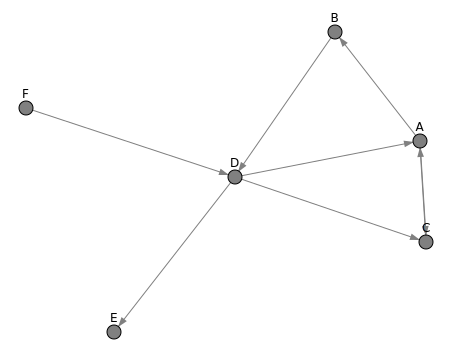

In [5]:
image = skn.visualization.graphs.visualize_graph(adjacency=graph.adjacency, names=graph.names, name_position='above')
SVG(image)

Previously we saw that the PageRank update rule is given by:

${\bf P_r(t+1)} = d{\bf \hat{O}P_r(t)} + \frac{1-d}{N_p}{\bf 1}$

Where: 
* ${\bf P_r(t)}$ is a column vector containing all the page ranks at step $t$
* ${\bf \hat{O}}$ is a modified form of the adacency matrix, where each element $\hat{O}_{i,j}$ is the ratio of edges from $j \rightarrow i$ divided by the total out-degree of node $j$
* ${\bf 1}$ is a column vector consisting of $N_p$ elements.

The term $\frac{1-d}{N_p}{\bf 1}$ in our update rule describes the *fly-out* probability. This is the chance we'll end up at node $i$, from node $j$, where there's not necessarily a direct connection. Normally, the column vector ${\bf 1}$ is composed entirely of $1$'s. However, in the Personalized PageRank, we limit the flyout probability to only the node(s) we want to focus on. Therefore, only the elements for those nodes will be set to 1.0, the remainder will all be 0.0.

Let's write a new class to handle personalized PageRank:

In [6]:
class PersonalizedPageRank(PageRank):

    def __init__(self, selected_nodes: List=[], damping_factor: float=0.85, epsilon: float=1e-8) -> None:
        super().__init__(damping_factor,epsilon)
        self.selected_nodes = selected_nodes

    def _identity_vector(self, graph: Graph) -> np.array:
        I = np.zeros((graph.get_number_nodes(),1))
        idx_selected = [graph.get_nodes().index(n) for n in graph.get_nodes() if n in self.selected_nodes] 
        I[idx_selected] = 1.0
        return I

In [7]:
# create a graph object
graph = Graph(edges)

In [15]:
# create a pagerank object
pr = PersonalizedPageRank(selected_nodes=["D"])

In [16]:
# compute pageranks
ranks = pr.evaluate(graph)

In [17]:
ranks

{'A': 0.31949232357672286,
 'B': 0.1667130726847682,
 'C': 0.23791468049806838,
 'D': 0.20467831542714038,
 'E': 0.07120160781330016,
 'F': 0.0}

In [18]:
pr._identity_vector(graph)

array([[0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.]])